# LAB Assignment 1 of IMAGE SIGNAL PROCESSING
**Mansi Kakkar**
**EE21S063**

In [21]:
!ls

cells_scale.png    lena_translate.png pisa_rotate.png


**Libraries Imported**

imageio : for reading the image

math : for implying floor function

numpy : for finding size of image

matplotlib : for plotting the function

In [22]:
import imageio
import math
import numpy as np
from matplotlib import pyplot as plt

**Reading the Images**

In [23]:
#reading image
lena=imageio.imread("lena_translate.png") #translation
pisa=imageio.imread("pisa_rotate.png")  #rotation
cells=imageio.imread("cells_scale.png") #scaling

**Bilinear Interpolation**

Applying bilinear interpolation for filling out the intensities for source values corresponding to target values.


In [24]:
#FUNCTION FOR BILINEAR INTERPOLATION

def bilinear_interpolation(source,x,y):
    
    #taking coordinates of zero padded image
    xz,yz=np.shape(source)
    #original coordinates of image
    xz=xz-2 
    yz=yz-2
    
    #taking x+1 and y+1 since coordinates have to be aligned to the zero padded image
    #zero padded image has one coordinate +1 due to padding hence target image coordinate is incremented by 1
    x=x+1
    y=y+1
    
    #defining x',y' as floor of x,y 
    x_prime=math.floor(x)
    y_prime=math.floor(y)
    #defining a,b as distance of target point from floor points
    a=x-x_prime
    b=y-y_prime
    
    if x_prime>=0 and x_prime<=xz and y_prime>=0 and y_prime<=yz:
        #calculating the intensity at the target
        intensity = (1-a)*(1-b)*source[x_prime,y_prime]+(1-a)*b*source[x_prime,y_prime+1]+a*(1-b)*source[x_prime+1,y_prime]+a*b*source[x_prime+1,y_prime+1]
        #converting intensity into integer as intensity value cannot be float
        intensity=int(intensity)
    else:
        #when xs and ys are not defined i.e. xs and ys are <0 for corresponding target location
        intensity = 0

    return intensity

**TRANSLATION**

[Xt] = [Xs] + [tx]

[Yt] = [Ys] + [ty]


In [25]:
#FUNCTION FOR TRANSLATION

def translate(source_image, tx, ty):
  #reading image size
  x,y=np.shape(source_image)

  #creating a blank image
  trans_image=np.zeros((x,y))
  
  #zero padded source image
  zero_padded_image=np.zeros((x+2, y+2))
  zero_padded_image[1:-1,1:-1]=source_image
  
  #nested for loops for target coorinates ranging to source coordinates
  for xt in range(x):
    for yt in range(y):
      xs=xt-tx
      ys=yt-ty
      intensity=bilinear_interpolation(zero_padded_image,xs,ys)
      trans_image[xt,yt]=intensity

  return trans_image

**ROTATION**

Rotation of the image about the center by an angle theta(𝛉)


In [26]:
#FUNCTION FOR ROTATION

def rotation(source_image, theta):
  
  #reading image size
  x , y = np.shape(source_image)

  #creating a blank image
  rot_image=np.zeros((x,y))

  #zero padded source image
  zero_padded_image=np.zeros((x+2,y+2))
  zero_padded_image[1:-1,1:-1]=source_image

  #calculating center coordinates sicne rotation of the image has to be done about the center of the image
  x_center=x/2  
  y_center=y/2

  #theta : degrees to radians
  theta=theta*(np.pi)/180

  #nested for loops for target coorinates ranging to source coordinates
  for xt in range(x):
    for yt in range(y):
      #every target point to be rotated about the center
      xt_c=xt-x_center
      yt_c=yt-y_center

      #applying clockwise rotation matrix :
      #   [Xt] = [clockwise rotation matrix][Xs]
      #   Considering inverse rotation matrix
      xs = np.cos(theta)*xt_c - np.sin(theta)*yt_c + x_center
      ys = np.sin(theta)*xt_c + np.cos(theta)*yt_c + y_center
      intensity=bilinear_interpolation(zero_padded_image,xs,ys)
      rot_image[xt,yt]=intensity
      
  return rot_image



**SCALING**
Performing the Scaling operation on the source image

Considering the first scaling operation [SCALING 1] we scaled it as per the definition which states that : 

[Xt] = scaling factor [Xs]

[Xs] = [Xt] / scaling factor

In [27]:
#FUNCTION FOR SCALING_1
def scaling1(source_image, a):

  #reading image size
  x , y = np.shape(source_image)

  #creating a blank image
  scale_image=np.zeros((x,y))

  #zero padded source image
  zero_padded_image=np.zeros((x+2,y+2))
  zero_padded_image[1:-1,1:-1]=source_image
  #a>0
  if a>0:

    #nested for loops for target coorinates ranging to source coordinates
    for xt in range(x): 
      for yt in range(y):
       #scaling it about the center 
       xs=xt/a
       ys=yt/a
       intensity=bilinear_interpolation(zero_padded_image,xs,ys)
       scale_image[xt,yt]=intensity
  return scale_image

In SCALING 2 we have scaled the image by about the center

Difference in the both the approaches can be observed in the output of both the codes


In [29]:
#FUNCTION FOR SCALING_2
def scaling2(source_image, a):

  #reading image size
  x , y = np.shape(source_image)

  #creating a blank image
  scale_image=np.zeros((x,y))

  #zero padded source image
  zero_padded_image=np.zeros((x+2,y+2))
  zero_padded_image[1:-1,1:-1]=source_image

  #calculating center coordinates sicne rotation of the image has to be done about the center of the image
  x_center=x/2  
  y_center=y/2

  #a>0
  if a>0:

    #nested for loops for target coorinates ranging to source coordinates
    for xt in range(x): 
      for yt in range(y):
       #scaling it about the center 
       xs=(xt-x_center)/a + x_center
       ys=(yt-y_center)/a + y_center
       intensity=bilinear_interpolation(zero_padded_image,xs,ys)
       scale_image[xt,yt]=intensity
  return scale_image


**RESULTS**

Results can be observed in the following plots ( translation, rotation, scaling ) when the respective functions are called.

**PLOTTING**

According to the given question:



1. Translate the given image (lena translate.png) by (tx = 3.75, ty = 4.3) pixels.
2. Rotate the given image (pisa rotate.png) about the image centre, so as to straighten the
Pisa tower.
3. Scale the given image (cells scale.png) by 0.8 and 1.3 factors.


In [30]:
#TRANSLATION
Tx=3.75
Ty=4.3
new_lena=translate(lena, Tx, Ty)

#plotting translation
fig, ((ax1,ax2))=plt.subplots(1,2,figsize=(9,12),constrained_layout=True)
ax1.imshow(lena,'gray')
ax1.set_title('Original Image')
ax2.imshow(new_lena,'gray')
ax2.set_title("Translated Image by tx=3.75 and ty=4.3")
plt.show()

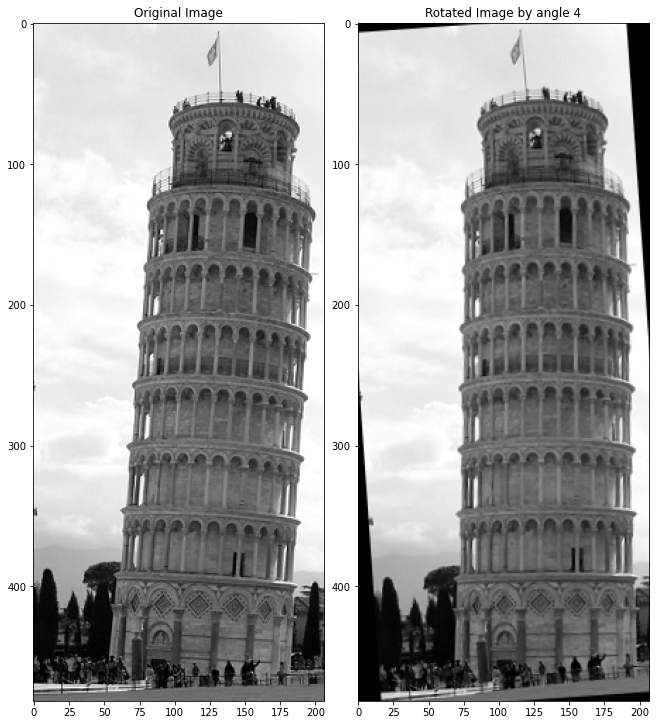

In [31]:
#ROTATION
theta=-4
new_pisa=rotation(pisa, theta)
#plotting rotation
fig, ((ax1,ax2))=plt.subplots(1,2,figsize=(9,12),constrained_layout=True)
ax1.imshow(pisa,'gray')
ax1.set_title('Original Image')
ax2.imshow(new_pisa,'gray')
ax2.set_title('Rotated Image by angle 4')
plt.show()

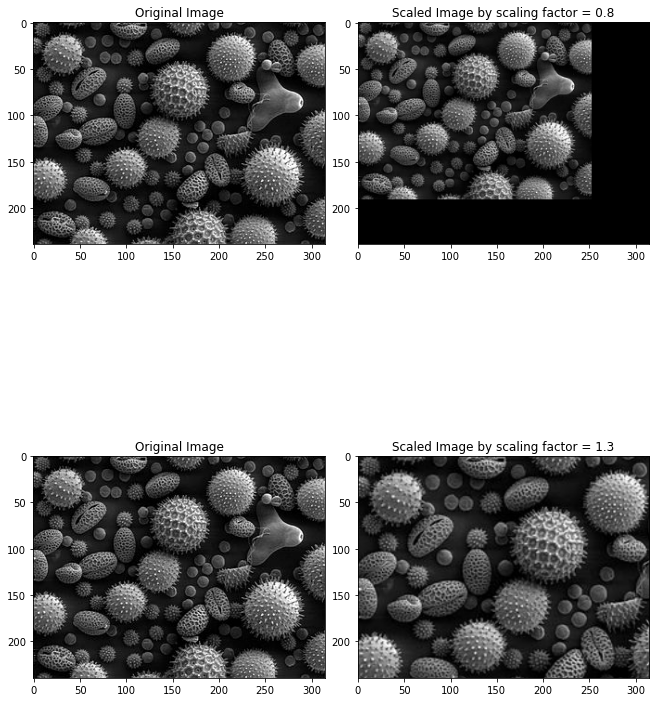

In [32]:
#SCALING 
a1=0.8 
a2=1.3

#SCALING 1
new_cells_zoom_out1=scaling1(cells, a1)
new_cells_zoom_in1=scaling1(cells, a2)

#plotting scaling (not about the center)
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(9,12),constrained_layout=True)
ax1.imshow(cells,'gray')
ax1.set_title('Original Image')
ax2.imshow(new_cells_zoom_out1,'gray')
ax2.set_title('Scaled Image by scaling factor = 0.8')
ax3.imshow(cells,'gray')
ax3.set_title('Original Image')
ax4.imshow(new_cells_zoom_in1,'gray')
ax4.set_title('Scaled Image by scaling factor = 1.3')
plt.show()

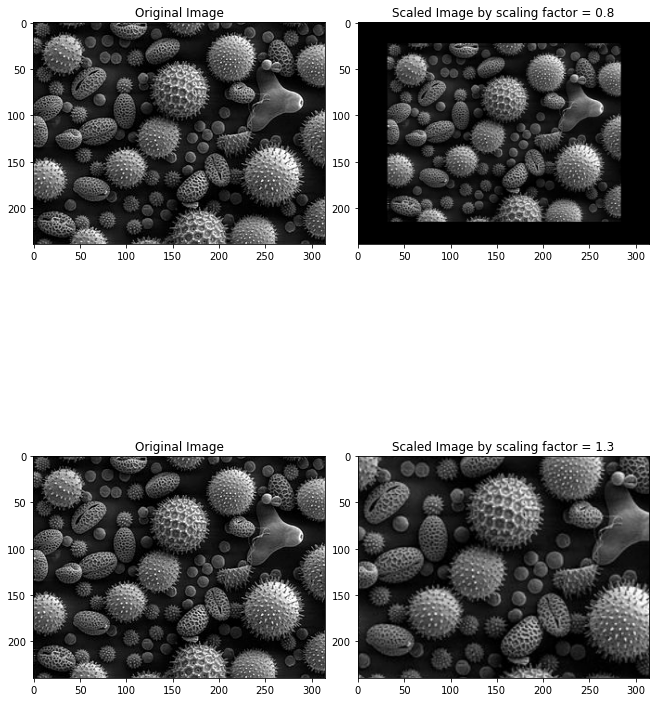

In [33]:
#SCALING 2
new_cells_zoom_out2=scaling2(cells, a1)
new_cells_zoom_in2=scaling2(cells, a2)

#plotting scaling (not about the center)
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(9,12),constrained_layout=True)
ax1.imshow(cells,'gray')
ax1.set_title('Original Image')
ax2.imshow(new_cells_zoom_out2,'gray')
ax2.set_title('Scaled Image by scaling factor = 0.8')
ax3.imshow(cells,'gray')
ax3.set_title('Original Image')
ax4.imshow(new_cells_zoom_in2,'gray')
ax4.set_title('Scaled Image by scaling factor = 1.3')
plt.show()

We have considered both the codes SCALING 1 and SCALING 2 to get the understanding of the importance of scaling pivot.
In the first one it is scaled with respect to the origin i.e. top left corner of the image.
In the second one it is scaled with respect to the geometric center of the image.

**OBSERVATIONS**

We can make the following observation from the above outputs: 

*   We can observe the translated image to have shifted 
*   By doing target to source mapping through bilinear interpolation we have solved the problem of jaggerdness, 
    or missing values and have got smooth image
*   Zero padding is necessary, otherwise interpolation process would have faced problem at the edges of image
*   By hit and trial image of the tower of pisa has been rotated and decided to be set to 4 degrees anticlockwise
*   Angle -4 degrees does justice to straightening of the tower
*   Taking two codes of scaling we can show how scaling about the center makes the difference with respect to 
    scaling without at center
*   For a>0 we get zoomed in image 
*   For a<0 we get scaled out image
